# Models baseline

# 1. Imports

## 1.1 Packages

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt

from store_sales.pipelines.model_training.nodes import simple_moving_average, exponential_moving_average

## 1.2 Options

In [2]:
lags = [20, 30, 45, 60, 90, 120, 365, 730]
alphas = [0.95, 0.9, 0.8, 0.7, 0.5]

## 1.3 Dataset

In [3]:
df_train = pd.read_parquet("../data/04_feature/df_train_feature_engineered.parquet")

df_test = pd.read_parquet("../data/04_feature/df_test_feature_engineered.parquet")

# 2. Simple moving average

In [4]:
df_train.sample(2)

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type,...,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,season,holiday_type,is_workday,is_train,is_validation
2888635,2840521,2017-05-18,1,GROCERY II,35.0,0,1662.0,Quito,Pichincha,D,...,False,False,False,False,False,1,None,1,1,0
2265019,2229379,2016-06-08,11,SCHOOL AND OFFICE SUPPLIES,0.0,0,2070.0,Cayambe,Pichincha,B,...,False,False,False,False,False,2,None,1,1,0


In [5]:
df_ma = simple_moving_average(df_train, lags=lags)

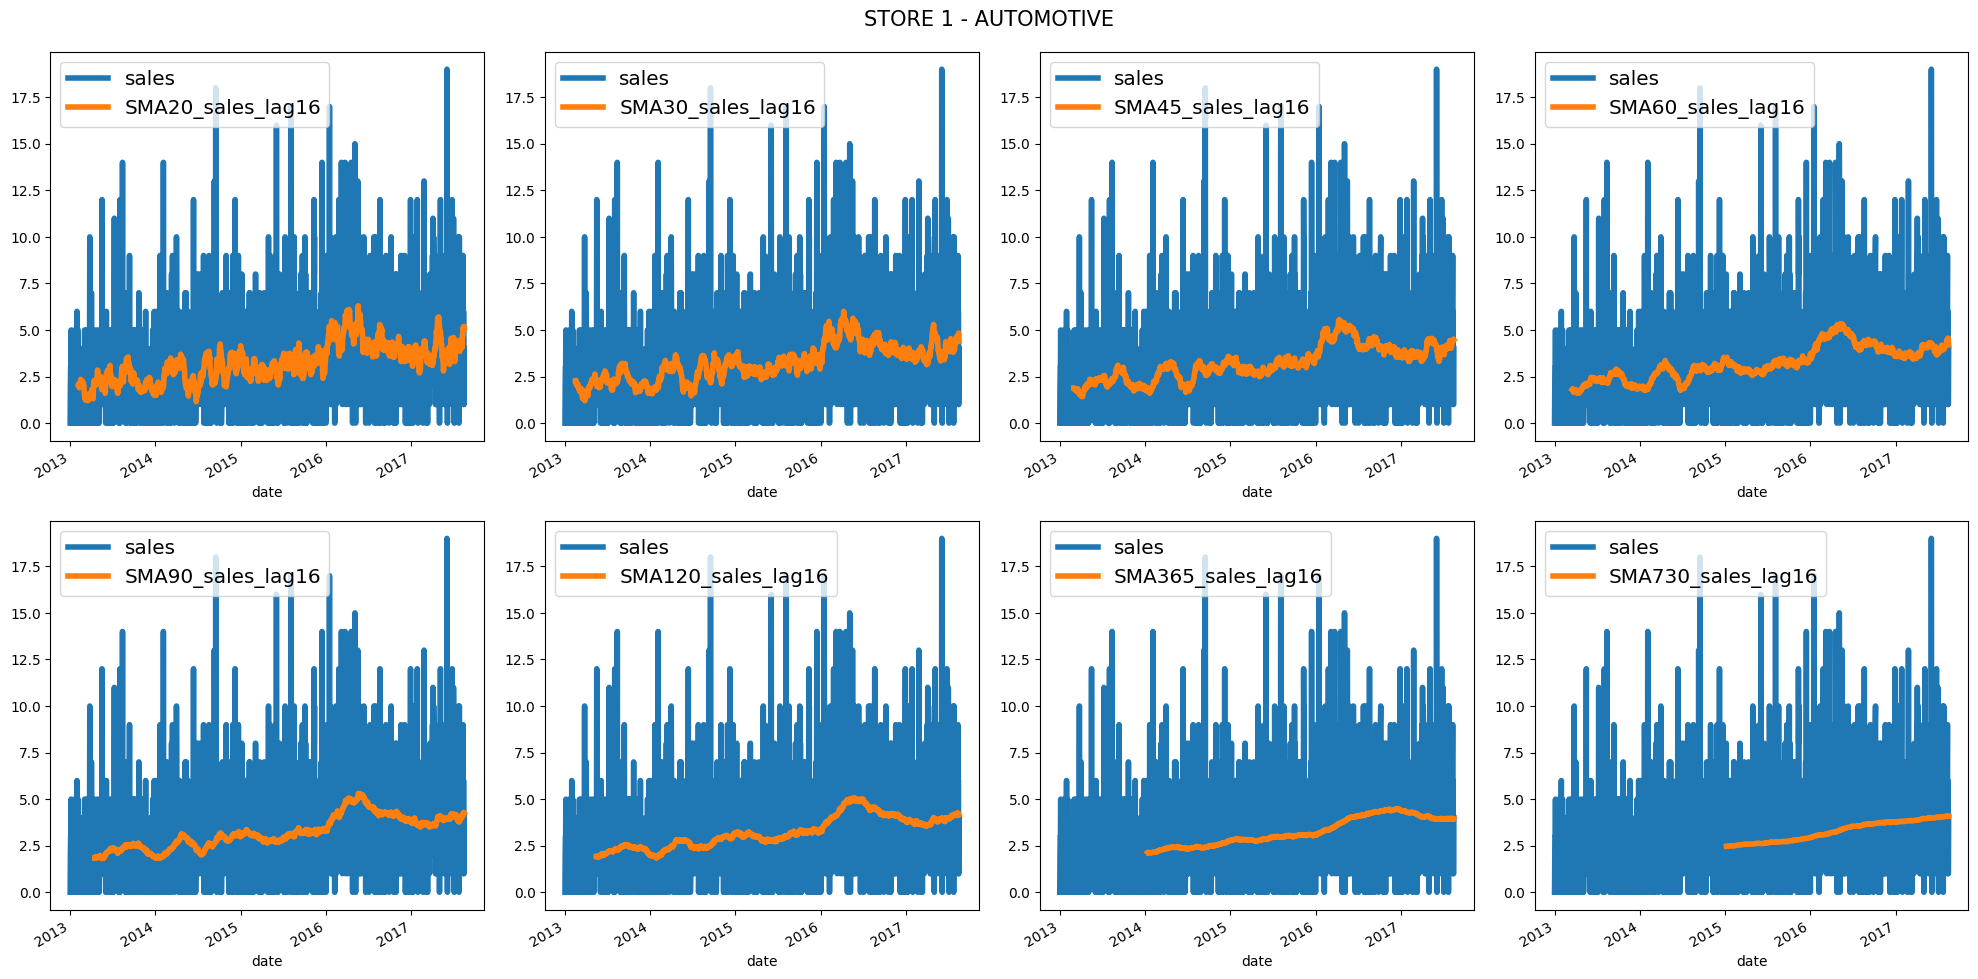

In [6]:
df_plot = df_ma[(df_ma.store_nbr == 1)].set_index("date")
list_families = df_plot.family.unique()
family = list_families[0]

fig, ax = plt.subplots(2,4,figsize=(20,10))
axes = ax.flatten()
for i, lag in enumerate(lags):
    df_plot[df_plot["family"] == family][["sales", f"SMA{lag}_sales_lag16"]].plot(legend=True, ax=axes[i], linewidth=4)
    axes[i].legend(fontsize="x-large")
plt.suptitle("STORE 1 - " + family, fontsize=15)
plt.tight_layout(pad = 1.5)
plt.show()

In [7]:
df_ea = exponential_moving_average(df_train, alphas=alphas, lags=lags)

<Axes: title={'center': 'STORE 1 - GROCERY I'}, xlabel='date'>

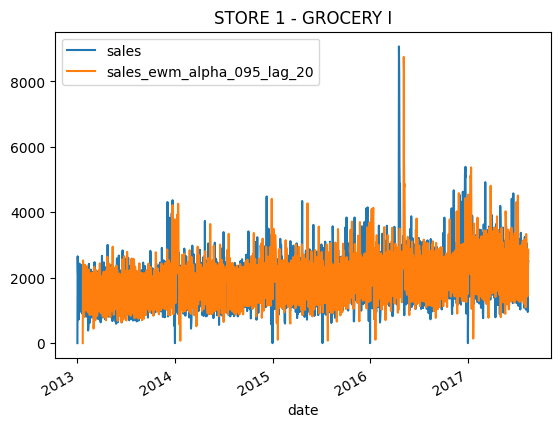

In [9]:
(
    df_ea[(df_ea.store_nbr == 1) & (df_ea.family == "GROCERY I")]
    .set_index("date")[["sales", "sales_ewm_alpha_095_lag_20"]]
    .plot(title = "STORE 1 - GROCERY I")
)